<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Semanal Nº3
Análisis de Fourier: FFT, desparramo, interpolación y ventaneo
#### Lucas Douat

## Introducción

En esta tarea semanal se abordará un fenómeno característico del análisis espectral mediante la Transformada Discreta de Fourier (DFT): el **efecto de desparramo espectral** o *spectral leakage*. Este efecto se manifiesta cuando una señal periódica no se ajusta exactamente a una frecuencia bin del espectro, generando una dispersión de energía en múltiples componentes espectrales.

El objetivo principal es analizar cómo pequeñas desintonías en la frecuencia de una señal senoidal afectan su representación espectral, y cómo técnicas como el **zero padding** pueden influir en la visualización del espectro. Además, se verificará la potencia de las señales mediante la **identidad de Parseval**

## Analisis y Desarrollo

### a) Efecto de la desintonía en el espectro

Se generan tres señales senoidales con frecuencias:

$$f_1 = \frac{N}{4} \cdot \Delta f$$
$$f_2 = \left(\frac{N}{4} + 0.25\right) \cdot \Delta f$$
$$f_3 = \left(\frac{N}{4} + 0.5\right) \cdot \Delta f$$

Estas señales tienen **potencia unitaria** y se analizan mediante la FFT.

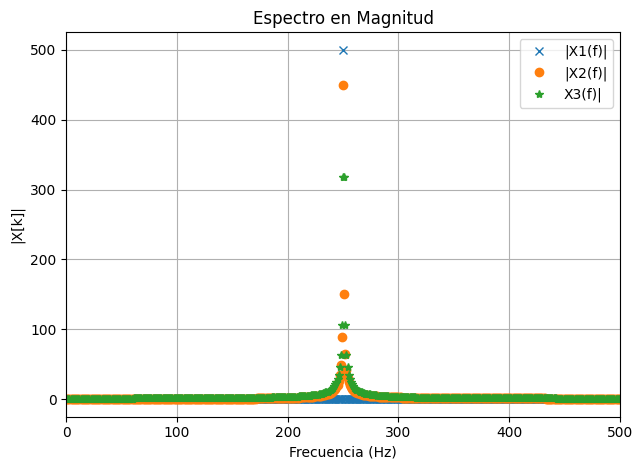

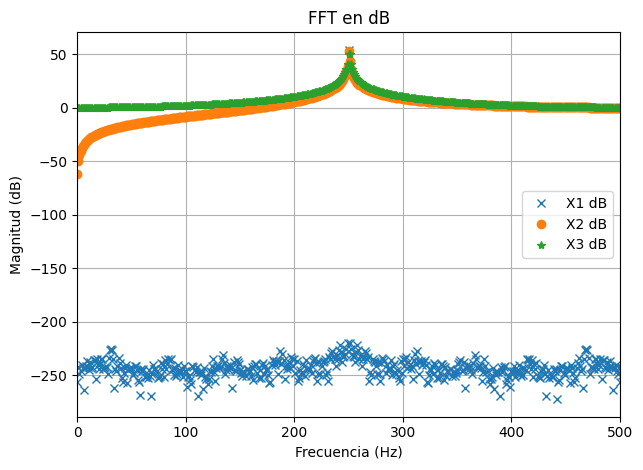

In [30]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 28 20:49:33 2025

@author: lucas-douat

Tarea Semanl N°3: Análisis de Fourier: FFT, desparramo, interpolación y ventaneo.
"""
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft as fft

#Parámetros de la señal
fs = N = 1000 #fs: Frecnuencia de Muestro | N: Cantidad de Muestras.
df = fs/N # Resolución Espectral
ts = 1/fs # Resolución Temporal

#k0*(fs/N)
f1=N/4*df
f2=((N/4)+0.25)*df
f3=((N/4)+0.5)*df

#Sintetización de Señales:
tt=np.linspace(0, (N-1)*ts,N).flatten()
x1=np.sin(2*np.pi*f1*tt)
x2=np.sin(2*np.pi*f2*tt)
x3=np.sin(2*np.pi*f3*tt)

#Generación de Vectores para las FFT de mis señales.
X1=np.zeros(N,dtype=np.complex128())
X2=np.zeros(N,dtype=np.complex128())
X3=np.zeros(N,dtype=np.complex128())

#Generación del Vector de Frecuencia
ll= np.linspace(0, (N-1)*df,N).flatten()

#Calculo de la FFT mediante la función de numpy
X1=fft.fft(x1)
X2=fft.fft(x2)
X3=fft.fft(x3)

#Graficación de Espectro en Magnitud
plt.figure(1)
plt.clf()
plt.plot(ll,np.abs(X1),'x',label='|X1(f)|')
plt.plot(ll,np.abs(X2),'o',label='|X2(f)|')
plt.plot(ll,np.abs(X3),'*',label='X3(f)|')
plt.title('Espectro en Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|X[k]|')
plt.grid(True)
plt.tight_layout()
plt.legend()#Muestra los labels de los plots
plt.legend() #Muestra mis labels de la señal.
plt.xlim([0,fs/2])
plt.show()

# Grafica de Espectro en dB
plt.figure(2)
plt.clf()
plt.plot(ll, 20 * np.log10(np.abs(X1)) , 'x', label='X1 dB')
plt.plot(ll, 20 * np.log10(np.abs(X2)), 'o', label='X2 dB')
plt.plot(ll, 20 * np.log10(np.abs(X3)), '*', label='X3 dB')
plt.title('FFT en dB')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.xlim([0, fs/2])
plt.show()


### Análisis

La señal cuya frecuencia coincide exactamente con una bin de la DFT (f1) presenta un espectro concentrado en un único pico, lo que indica que toda su energía está contenida en una sola componente frecuencial.

En cambio, las señales desintonadas (f2 y f3), cuya frecuencia difiere ligeramente de una bin, muestran un espectro más disperso. Este fenómeno se conoce como **desparramo espectral** y se manifiesta como una distribución de energía en múltiples bins, en lugar de estar concentrada en una sola.

Este efecto ocurre porque la DFT asume que la señal analizada es periódica dentro de la ventana de observación. Cuando la frecuencia de la señal no se ajusta exactamente a una bin, se genera una discontinuidad en los bordes de la ventana, lo que provoca interferencia entre componentes espectrales y da lugar al desparramo.


### b) Verificación de potencia unitaria (Parseval)

En esta sección se busca verificar que las señales generadas poseen **potencia unitaria**, es decir, que su energía total es igual a 1.
Para esto se utilizará la **identidad de Parseval**, que establece la equivalencia entre la energía en el dominio temporal y la energía en el dominio frecuencial:

$$ \sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2 $$

Esta propiedad es fundamental en el análisis de Fourier, ya que permite validar que la transformación no altera la energía de la señal, sino que simplemente la redistribuye en el dominio de la frecuencia.

A continuación se calculará la energía de cada señal tanto en el dominio temporal como en el frecuencial, y se compararán los resultados para confirmar la validez de Parseval en este contexto.


In [31]:
#%% d) Parseval

# Normalización para potencia unitaria (varianza = 1)
x1_norm = x1 / np.sqrt(np.var(x1))
x2_norm = x2 / np.sqrt(np.var(x2))
x3_norm = x3 / np.sqrt(np.var(x3))

# FFT de las señales normalizadas
X1 = fft.fft(x1_norm)
X2 = fft.fft(x2_norm)
X3 = fft.fft(x3_norm)

# Verificación de Parseval
energy_time_x1 = np.sum(x1_norm**2)
energy_freq_x1 = np.sum(np.abs(X1)**2) / N

energy_time_x2 = np.sum(x2_norm**2)
energy_freq_x2 = np.sum(np.abs(X2)**2) / N

energy_time_x3 = np.sum(x3_norm**2)
energy_freq_x3 = np.sum(np.abs(X3)**2) / N

# Resultados
print("x1 - Varianza:", np.var(x1_norm), "Energía temporal:", energy_time_x1, "Energía en Dominio f:", energy_freq_x1)
print("x2 - Varianza:", np.var(x2_norm), "Energía temporal:", energy_time_x2, "Energía en Dominio f", energy_freq_x2)
print("x3 - Varianza:", np.var(x3_norm), "Energía temporal:", energy_time_x3, "Energía en Dominio f", energy_freq_x3)

x1 - Varianza: 1.0 Energía temporal: 999.9999999999999 Energía en Dominio f: 1000.0000000000001
x2 - Varianza: 0.9999999999999998 Energía temporal: 1000.0000000012328 Energía en Dominio f 1000.0000000012326
x3 - Varianza: 1.0 Energía temporal: 1000.0019874769548 Energía en Dominio f 1000.0019874769552


### Análisis

Tal como se indico anteriormente, el desparramo espectral no implica pérdida de energía, sino una redistribución de la misma en el dominio frecuencial. Al aplicar la identidad de Parseval, se confirma que la energía total de cada señal, tanto en el dominio temporal como en el frecuencial, es igual, lo que valida que las señales tienen **potencia unitaria**.

Este resultado refuerza la idea de que, aunque el espectro visual pueda variar significativamente por pequeñas desintonías, la **energética** de la señal permanece constante. La diferencia está en cómo esa energía se distribuye entre los bins de la DFT.

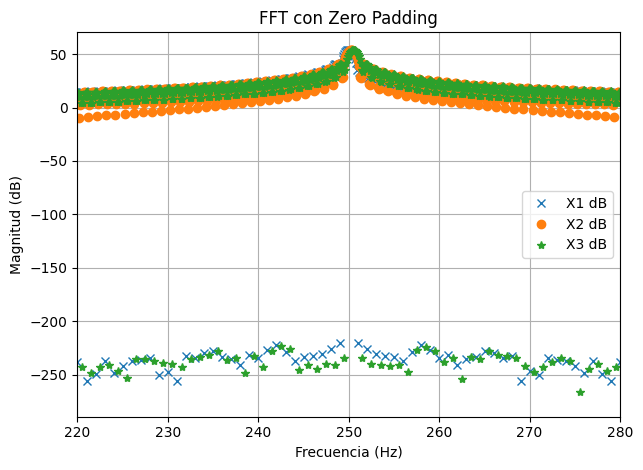

In [32]:
#%% c) Aplicar Zero Padding
x1_zp = np.concatenate([x1, np.zeros(9*N)])
X1_zp = fft.fft(x1_zp)
x2_zp = np.concatenate([x2, np.zeros(9*N)])
X2_zp = fft.fft(x2_zp)
x3_zp = np.concatenate([x3, np.zeros(9*N)])
X3_zp = fft.fft(x3_zp)

#Nuevo Vector de Frecuencia
ll_zp = np.linspace(0, fs, len(X1_zp)).flatten()

# Graficas de Espectro en dB con Zeo Padding
plt.figure(3)
plt.clf()
plt.plot(ll_zp, 20*np.log10(np.abs(X1_zp)),'x',label='X1 dB')
plt.plot(ll_zp, 20*np.log10(np.abs(X2_zp)),'o',label='X2 dB')
plt.plot(ll_zp, 20*np.log10(np.abs(X3_zp)),'*',label='X3 dB')
plt.title("FFT con Zero Padding")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.xlim([220, 280])
plt.show()


### Analisis

La técnica de **zero padding** permite aumentar la resolución espectral de forma ficticia, agregando ceros al final de la señal antes de aplicar la DFT. Esto no modifica la energía ni el contenido espectral de la señal, pero mejora la **visualización** del espectro al interpolar entre bins.

En este experimento, al aplicar un vector de 9*N ceros, se observa que los picos espectrales se vuelven más definidos y suaves, facilitando la identificación de frecuencias desintonadas. Esta técnica es especialmente útil cuando se necesita estimar frecuencias con mayor precisión o analizar señales con componentes cercanas entre sí.

Es importante destacar que el zero padding **no reduce el desparramo espectral**, pero sí permite observarlo con mayor detalle.


## Conclusiones

El análisis realizado permitió explorar cómo la DFT representa señales en el dominio frecuencial y cómo pequeñas desintonías pueden generar diferencias significativas en el espectro visualizado.

Se evidenció que el **desparramo espectral** es una consecuencia directa de la discretización y la ventana de observación, y que técnicas como el **zero padding** mejoran la resolución visual sin alterar la información espectral.

La verificación de Parseval confirmó la conservación de energía, y la normalización de señales permitió trabajar con condiciones controladas de potencia unitaria.

## Autoevaluación del aprendizaje

Durante el desarrollo de esta tarea se consolidaron varios conceptos fundamentales del análisis espectral:

- Comprensión del **efecto de desparramo espectral** y su relación con la alineación de frecuencias en la DFT.
- Aplicación de la **identidad de Parseval** para verificar la conservación de energía entre dominios.
- Uso del **zero padding** como herramienta para mejorar la resolución espectral sin alterar la señal original.

Además, se reforzó la importancia de la normalización de señales para asegurar condiciones como potencia unitaria, y se mejoró la capacidad de análisis crítico frente a resultados numéricos y la representación grafica de las señales.